<a href="https://colab.research.google.com/github/trieyed/AI/blob/main/BodyFat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BODY WEIGHT CLASSIFICATION DATASET**

**OBJECTIVE:**


To perform EDA and prepare a  model that predicts category of the person based on several other features.

### **1. MODULES IMPORT AND DATA LOAD**

In [133]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [130]:
# Loading the dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/body_fat_new (1).csv")

In [54]:
#Creating a copy
df = data.copy()

## **2. EXPLORATORY DATA ANALYSIS**

###**2.1 Data Profiling**

In [81]:
# Viewing the dataset's first 5 rows
data.head()

Density  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  Knee  \
0   1.0708   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0  37.3   
1   1.0853   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7  37.3   
2   1.0414   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6  38.9   
3   1.0751   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1  37.3   
4   1.0340   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2  42.2   

   Ankle  Biceps  Forearm  Wrist Category  
0   21.9    32.0     27.4   17.1     Lean  
1   23.4    30.5     28.9   18.2     Lean  
2   24.0    28.8     25.2   16.6      Fat  
3   22.8    32.4     29.4   18.2     Lean  
4   24.0    32.2     27.7   17.7      Fat

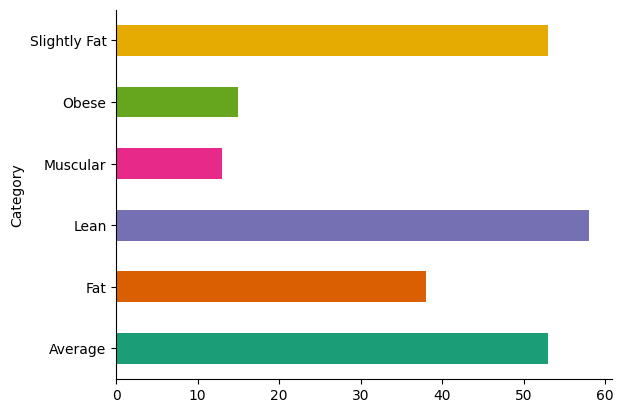

In [93]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

---
**Feature description:**
1. Density determined from underwater weighing
2. Age (years)
3. Weight (lbs)
4. Height (inches)
5. Neck circumference (cm)
6. Chest circumference (cm)
7. Abdomen 2 circumference (cm)
8. Hip circumference (cm)
9. Thigh circumference (cm)
10. Knee circumference (cm)
11. Ankle circumference (cm)
12. Biceps (extended) circumference (cm)
13. Forearm circumference (cm)
14. Wrist circumference (cm)
15. Category

---

In [55]:
# Display dataset summary
print("\n Dataset Summary:\n")
print(df.info())


 Dataset Summary:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Density   252 non-null    float64
 1   Age       252 non-null    int64  
 2   Weight    252 non-null    float64
 3   Height    252 non-null    float64
 4   Neck      252 non-null    float64
 5   Chest     252 non-null    float64
 6   Abdomen   252 non-null    float64
 7   Hip       252 non-null    float64
 8   Thigh     252 non-null    float64
 9   Knee      252 non-null    float64
 10  Ankle     252 non-null    float64
 11  Biceps    252 non-null    float64
 12  Forearm   252 non-null    float64
 13  Wrist     252 non-null    float64
 14  Category  252 non-null    object 
dtypes: float64(13), int64(1), object(1)
memory usage: 29.7+ KB
None


---
Here are the info we received:
1. 15 columns
2. 252 rows
3. No null values
4. All data are numerical except for one column-"Category", which contains data of objective type

---

In [56]:
#Basic stats overview on the data
print("\n Stats Overview:")
df.describe()


 Stats Overview:


Density         Age      Weight      Height        Neck       Chest  \
count  252.000000  252.000000  252.000000  252.000000  252.000000  252.000000   
mean     1.055574   44.884921  178.924405   70.148810   37.992063  100.824206   
std      0.019031   12.602040   29.389160    3.662856    2.430913    8.430476   
min      0.995000   22.000000  118.500000   29.500000   31.100000   79.300000   
25%      1.041400   35.750000  159.000000   68.250000   36.400000   94.350000   
50%      1.054900   43.000000  176.500000   70.000000   38.000000   99.650000   
75%      1.070400   54.000000  197.000000   72.250000   39.425000  105.375000   
max      1.108900   81.000000  363.150000   77.750000   51.200000  136.200000   

          Abdomen         Hip       Thigh        Knee       Ankle      Biceps  \
count  252.000000  252.000000  252.000000  252.000000  252.000000  252.000000   
mean    92.555952   99.904762   59.405952   38.590476   23.102381   32.273413   
std     10.783077    7.164058    5.249952    2.411805    1.694893    3.021274   
min     69.400000   85.000000   47.200000   33.000000   19.100000   24.800000   
25%     84.575000   95.500000   56.000000   36.975000   22.000000   30.200000   
50%     90.950000   99.300000   59.000000   38.500000   22.800000   32.050000   
75%     99.325000  103.525000   62.350000   39.925000   24.000000   34.325000   
max    148.100000  147.700000   87.300000   49.100000   33.900000   45.000000   

          Forearm       Wrist  
count  252.000000  252.000000  
mean    28.663889   18.229762  
std      2.020691    0.933585  
min     21.000000   15.800000  
25%     27.300000   17.600000  
50%     28.700000   18.300000  
75%     30.000000   18.800000  
max     34.900000   21.400000

### **2.2 Data Quality Checks**

#### **Checking Missing Values**

In [57]:
# Check for missing values
print("\n Missing Values:")
print(df.isnull().sum())


 Missing Values:
Density     0
Age         0
Weight      0
Height      0
Neck        0
Chest       0
Abdomen     0
Hip         0
Thigh       0
Knee        0
Ankle       0
Biceps      0
Forearm     0
Wrist       0
Category    0
dtype: int64


---

*   No missing values found. Data is clean.

---

#### **Checking for Duplicates**

In [58]:
# Check for duplicated values
print("\n Duplicated Values:")
df.duplicated().sum()


 Duplicated Values:


np.int64(0)

---

*   No duplicate values found either. Good Quality data.

---

###**2.3. Visualizations**

In [131]:
print("Correlation Matrix for Numerical Columns:")
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numerical_cols].corr()
display(correlation_matrix)

Correlation Matrix for Numerical Columns:


Density       Age    Weight    Height      Neck     Chest   Abdomen  \
Density  1.000000 -0.283117 -0.549839  0.057147 -0.417297 -0.634854 -0.785375   
Age     -0.283117  1.000000 -0.012681 -0.238290  0.142187  0.201057  0.273555   
Weight  -0.549839 -0.012681  1.000000  0.528017  0.777908  0.867970  0.846462   
Height   0.057147 -0.238290  0.528017  1.000000  0.286046  0.209278  0.173781   
Neck    -0.417297  0.142187  0.777908  0.286046  1.000000  0.727889  0.687393   
Chest   -0.634854  0.201057  0.867970  0.209278  0.727889  1.000000  0.884940   
Abdomen -0.785375  0.273555  0.846462  0.173781  0.687393  0.884940  1.000000   
Hip     -0.570972 -0.060045  0.918129  0.408979  0.654914  0.784154  0.828396   
Thigh   -0.508291 -0.224636  0.820574  0.320859  0.610384  0.655620  0.693114   
Knee    -0.452451  0.010044  0.841181  0.484783  0.618606  0.680244  0.703751   
Ankle   -0.225699 -0.190624  0.679817  0.467125  0.487270  0.489372  0.441517   
Biceps  -0.434217 -0.045330  0.748616  0.280356  0.666204  0.667896  0.611763   
Forearm -0.353538 -0.075654  0.782221  0.352001  0.763418  0.680101  0.583775   
Wrist   -0.245077  0.238001  0.684528  0.384136  0.717665  0.601101  0.545458   

              Hip     Thigh      Knee     Ankle    Biceps   Forearm     Wrist  
Density -0.570972 -0.508291 -0.452451 -0.225699 -0.434217 -0.353538 -0.245077  
Age     -0.060045 -0.224636  0.010044 -0.190624 -0.045330 -0.075654  0.238001  
Weight   0.918129  0.820574  0.841181  0.679817  0.748616  0.782221  0.684528  
Height   0.408979  0.320859  0.484783  0.467125  0.280356  0.352001  0.384136  
Neck     0.654914  0.610384  0.618606  0.487270  0.666204  0.763418  0.717665  
Chest    0.784154  0.655620  0.680244  0.489372  0.667896  0.680101  0.601101  
Abdomen  0.828396  0.693114  0.703751  0.441517  0.611763  0.583775  0.545458  
Hip      1.000000  0.861841  0.822665  0.607309  0.685904  0.679812  0.552050  
Thigh    0.861841  1.000000  0.769667  0.626063  0.705517  0.683062  0.472723  
Knee     0.822665  0.769667  1.000000  0.699063  0.601021  0.647171  0.616054  
Ankle    0.607309  0.626063  0.699063  1.000000  0.474366  0.580045  0.599863  
Biceps   0.685904  0.705517  0.601021  0.474366  1.000000  0.800284  0.563496  
Forearm  0.679812  0.683062  0.647171  0.580045  0.800284  1.000000  0.690787  
Wrist    0.552050  0.472723  0.616054  0.599863  0.563496  0.690787  1.000000

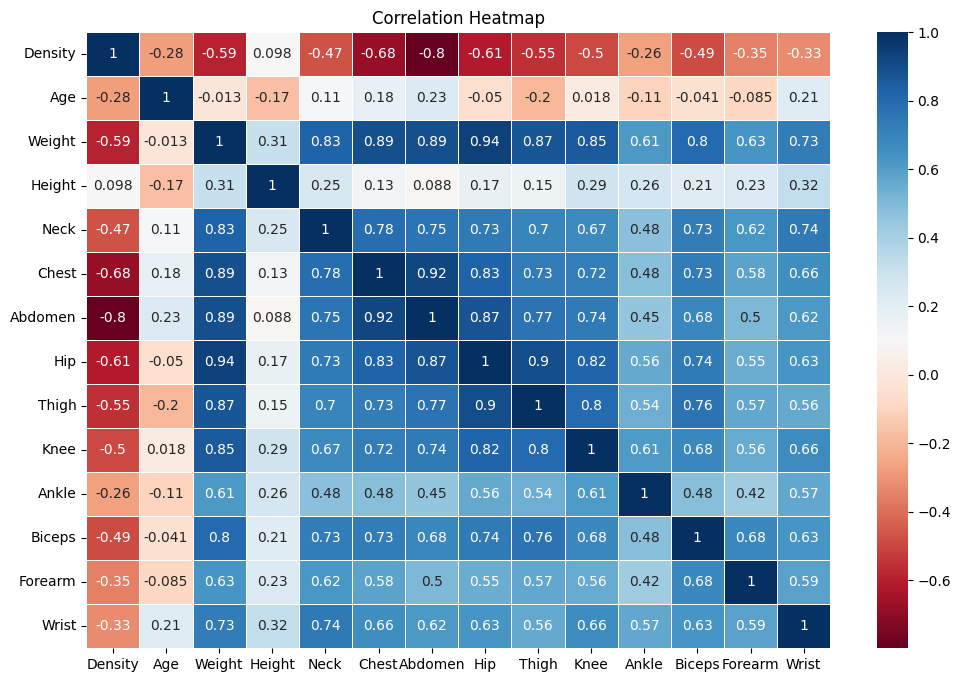

In [63]:
#Calculate Correlation Matrix
corr_matrix = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13]].corr()

#Plot correlation matrix in heatmap
# Visualize correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="RdBu", annot=True, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

---
The columns : **Neck, Chest, Abdomen, Hip, Thigh, Knee and Biceps** are seen to be highly correlated with each other marking that the growth of all these organs happens together.

---

Text(0, 0.5, 'Category')

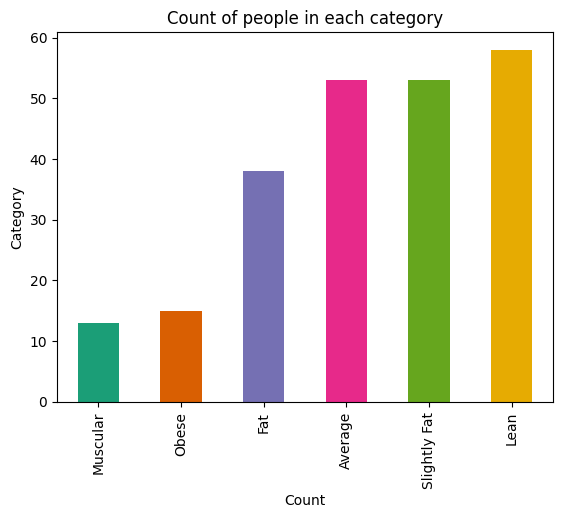

In [128]:
#Grouping the number of people in each category among 252 people
df.groupby('Category').size().sort_values(ascending=True).plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.title('Count of people in each category') # Added a title for clarity
plt.xlabel('Count') # Added xlabel
plt.ylabel('Category') # Added ylabel

We can see that most of the people belong to "Lean" category and "Slightly Fat" category while the least amount of people belong to "Muscular" category.

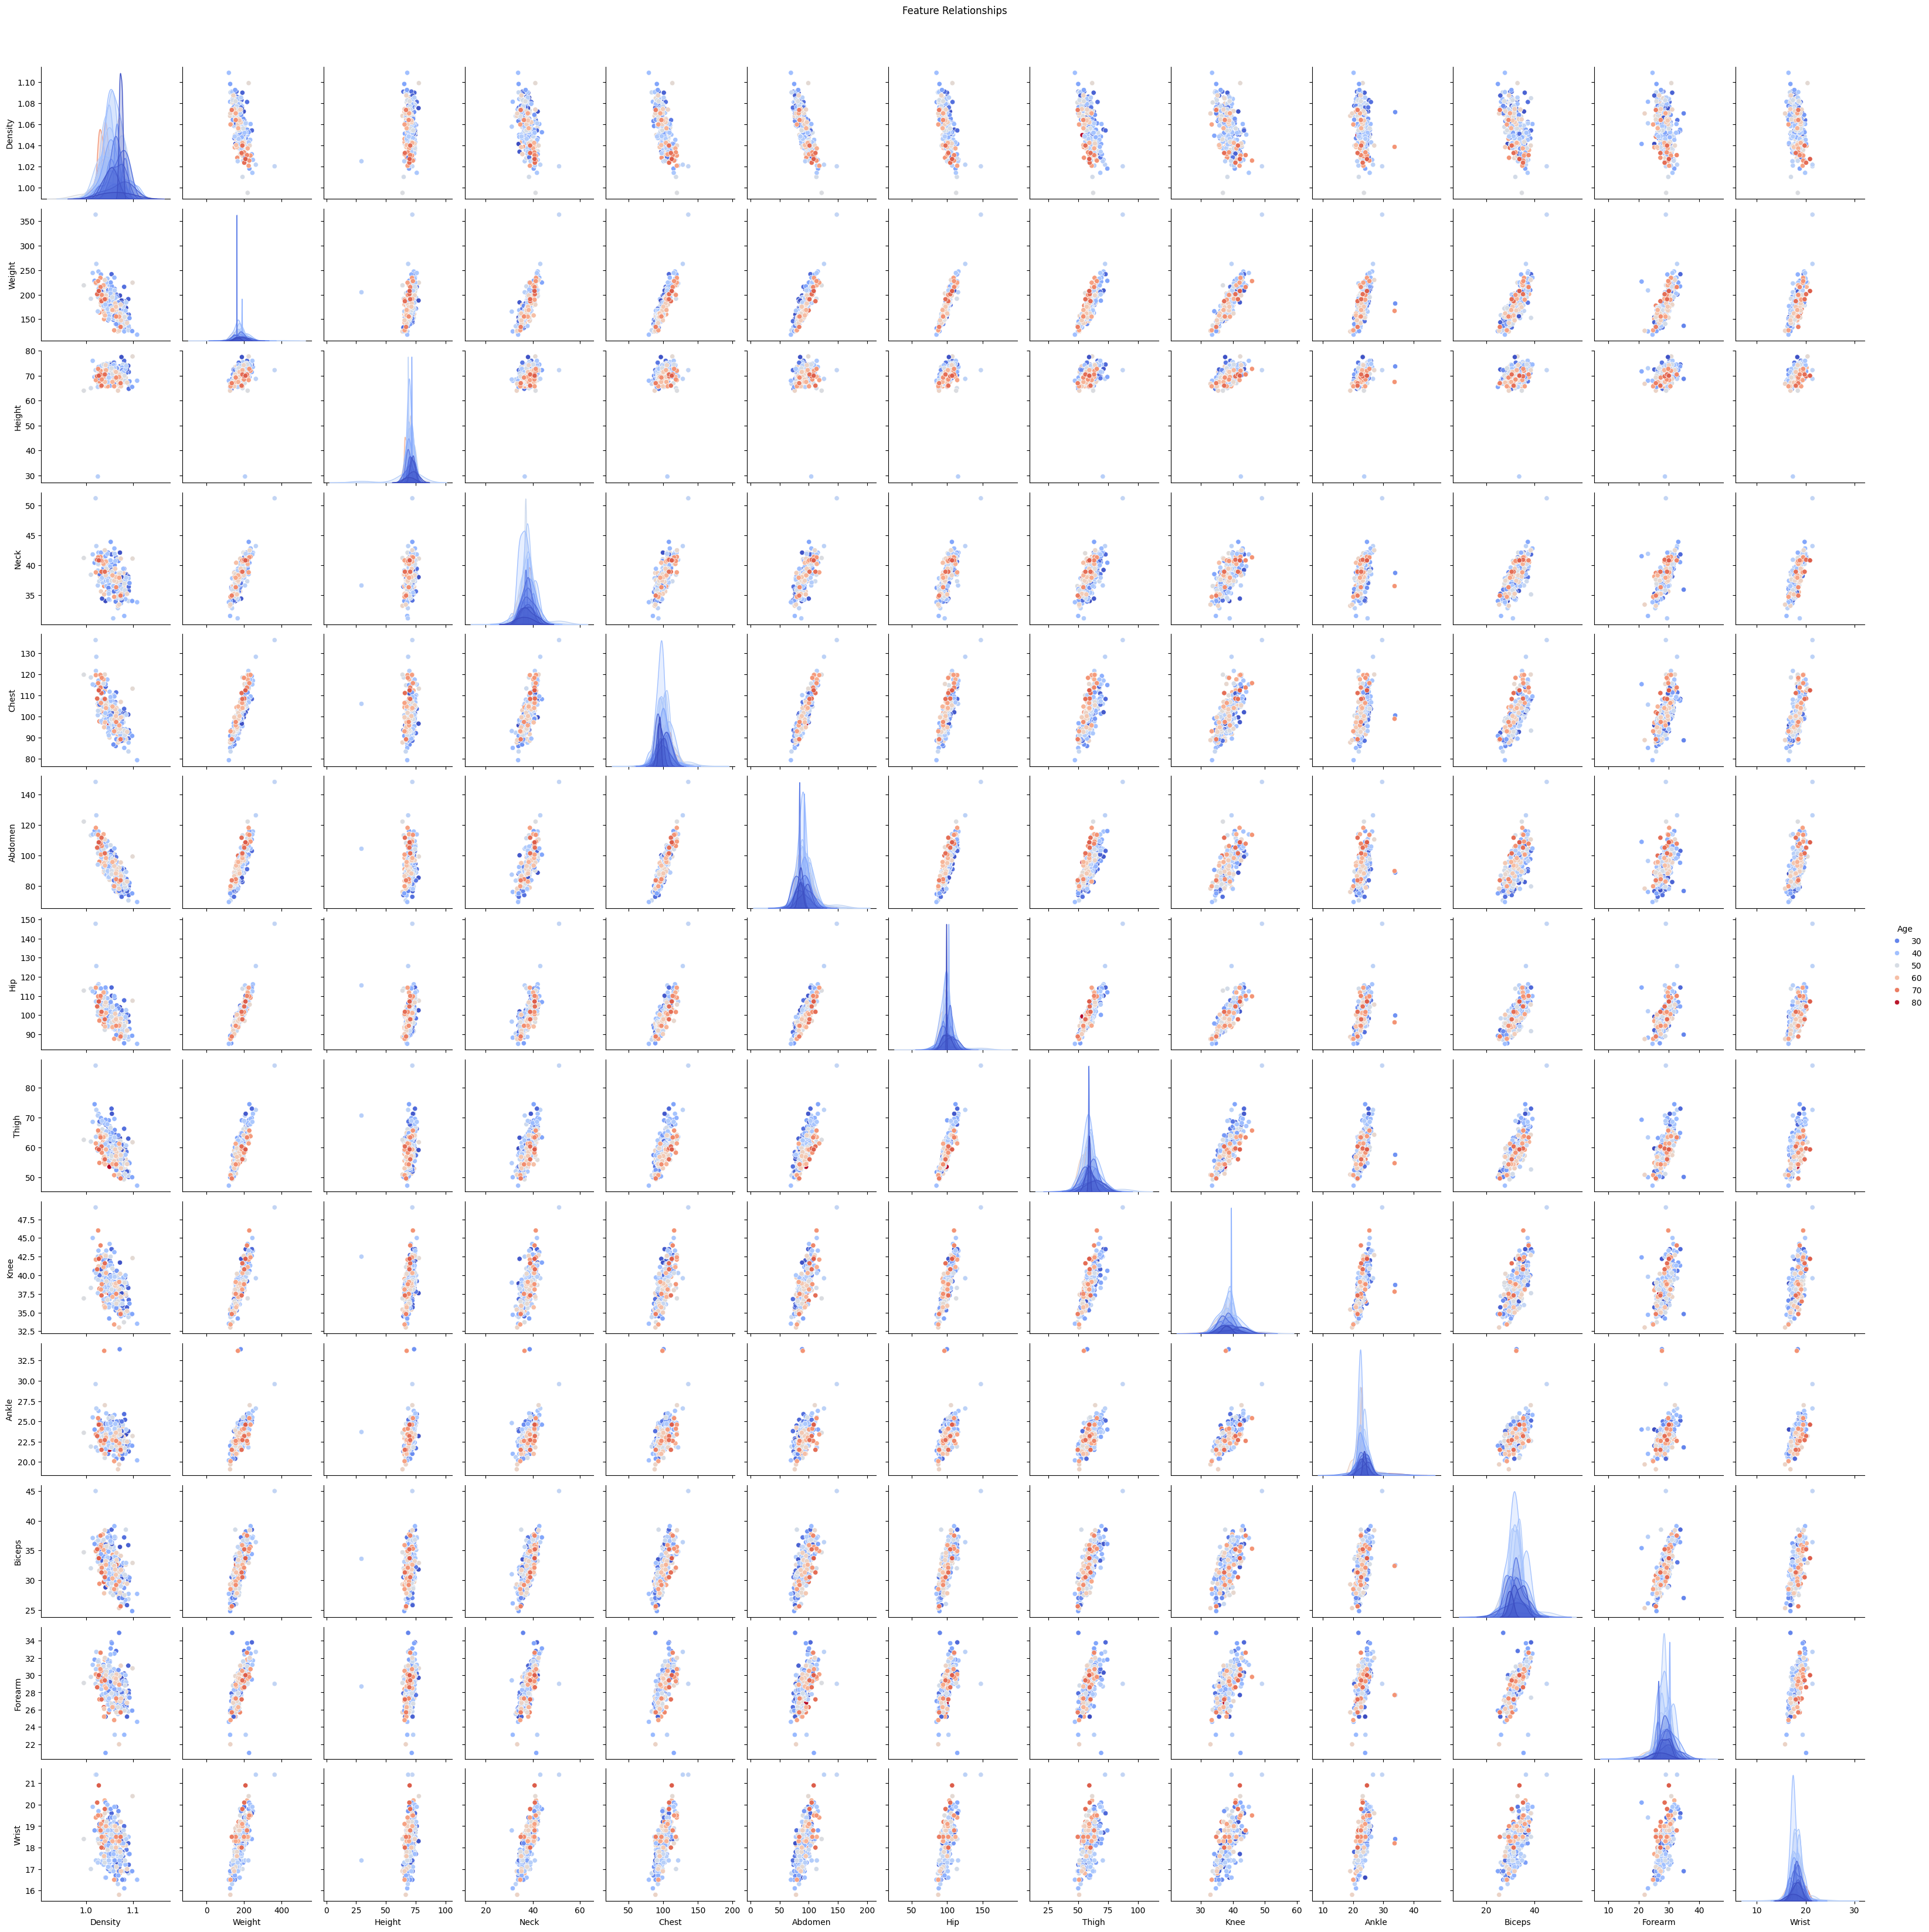

In [73]:
# Pairplot for feature distribution by Body Age to check relation between individual columns
sns.pairplot(df, diag_kind="kde",hue = "Age", palette="coolwarm")
plt.suptitle("Feature Relationships", y=1.02)
plt.show()

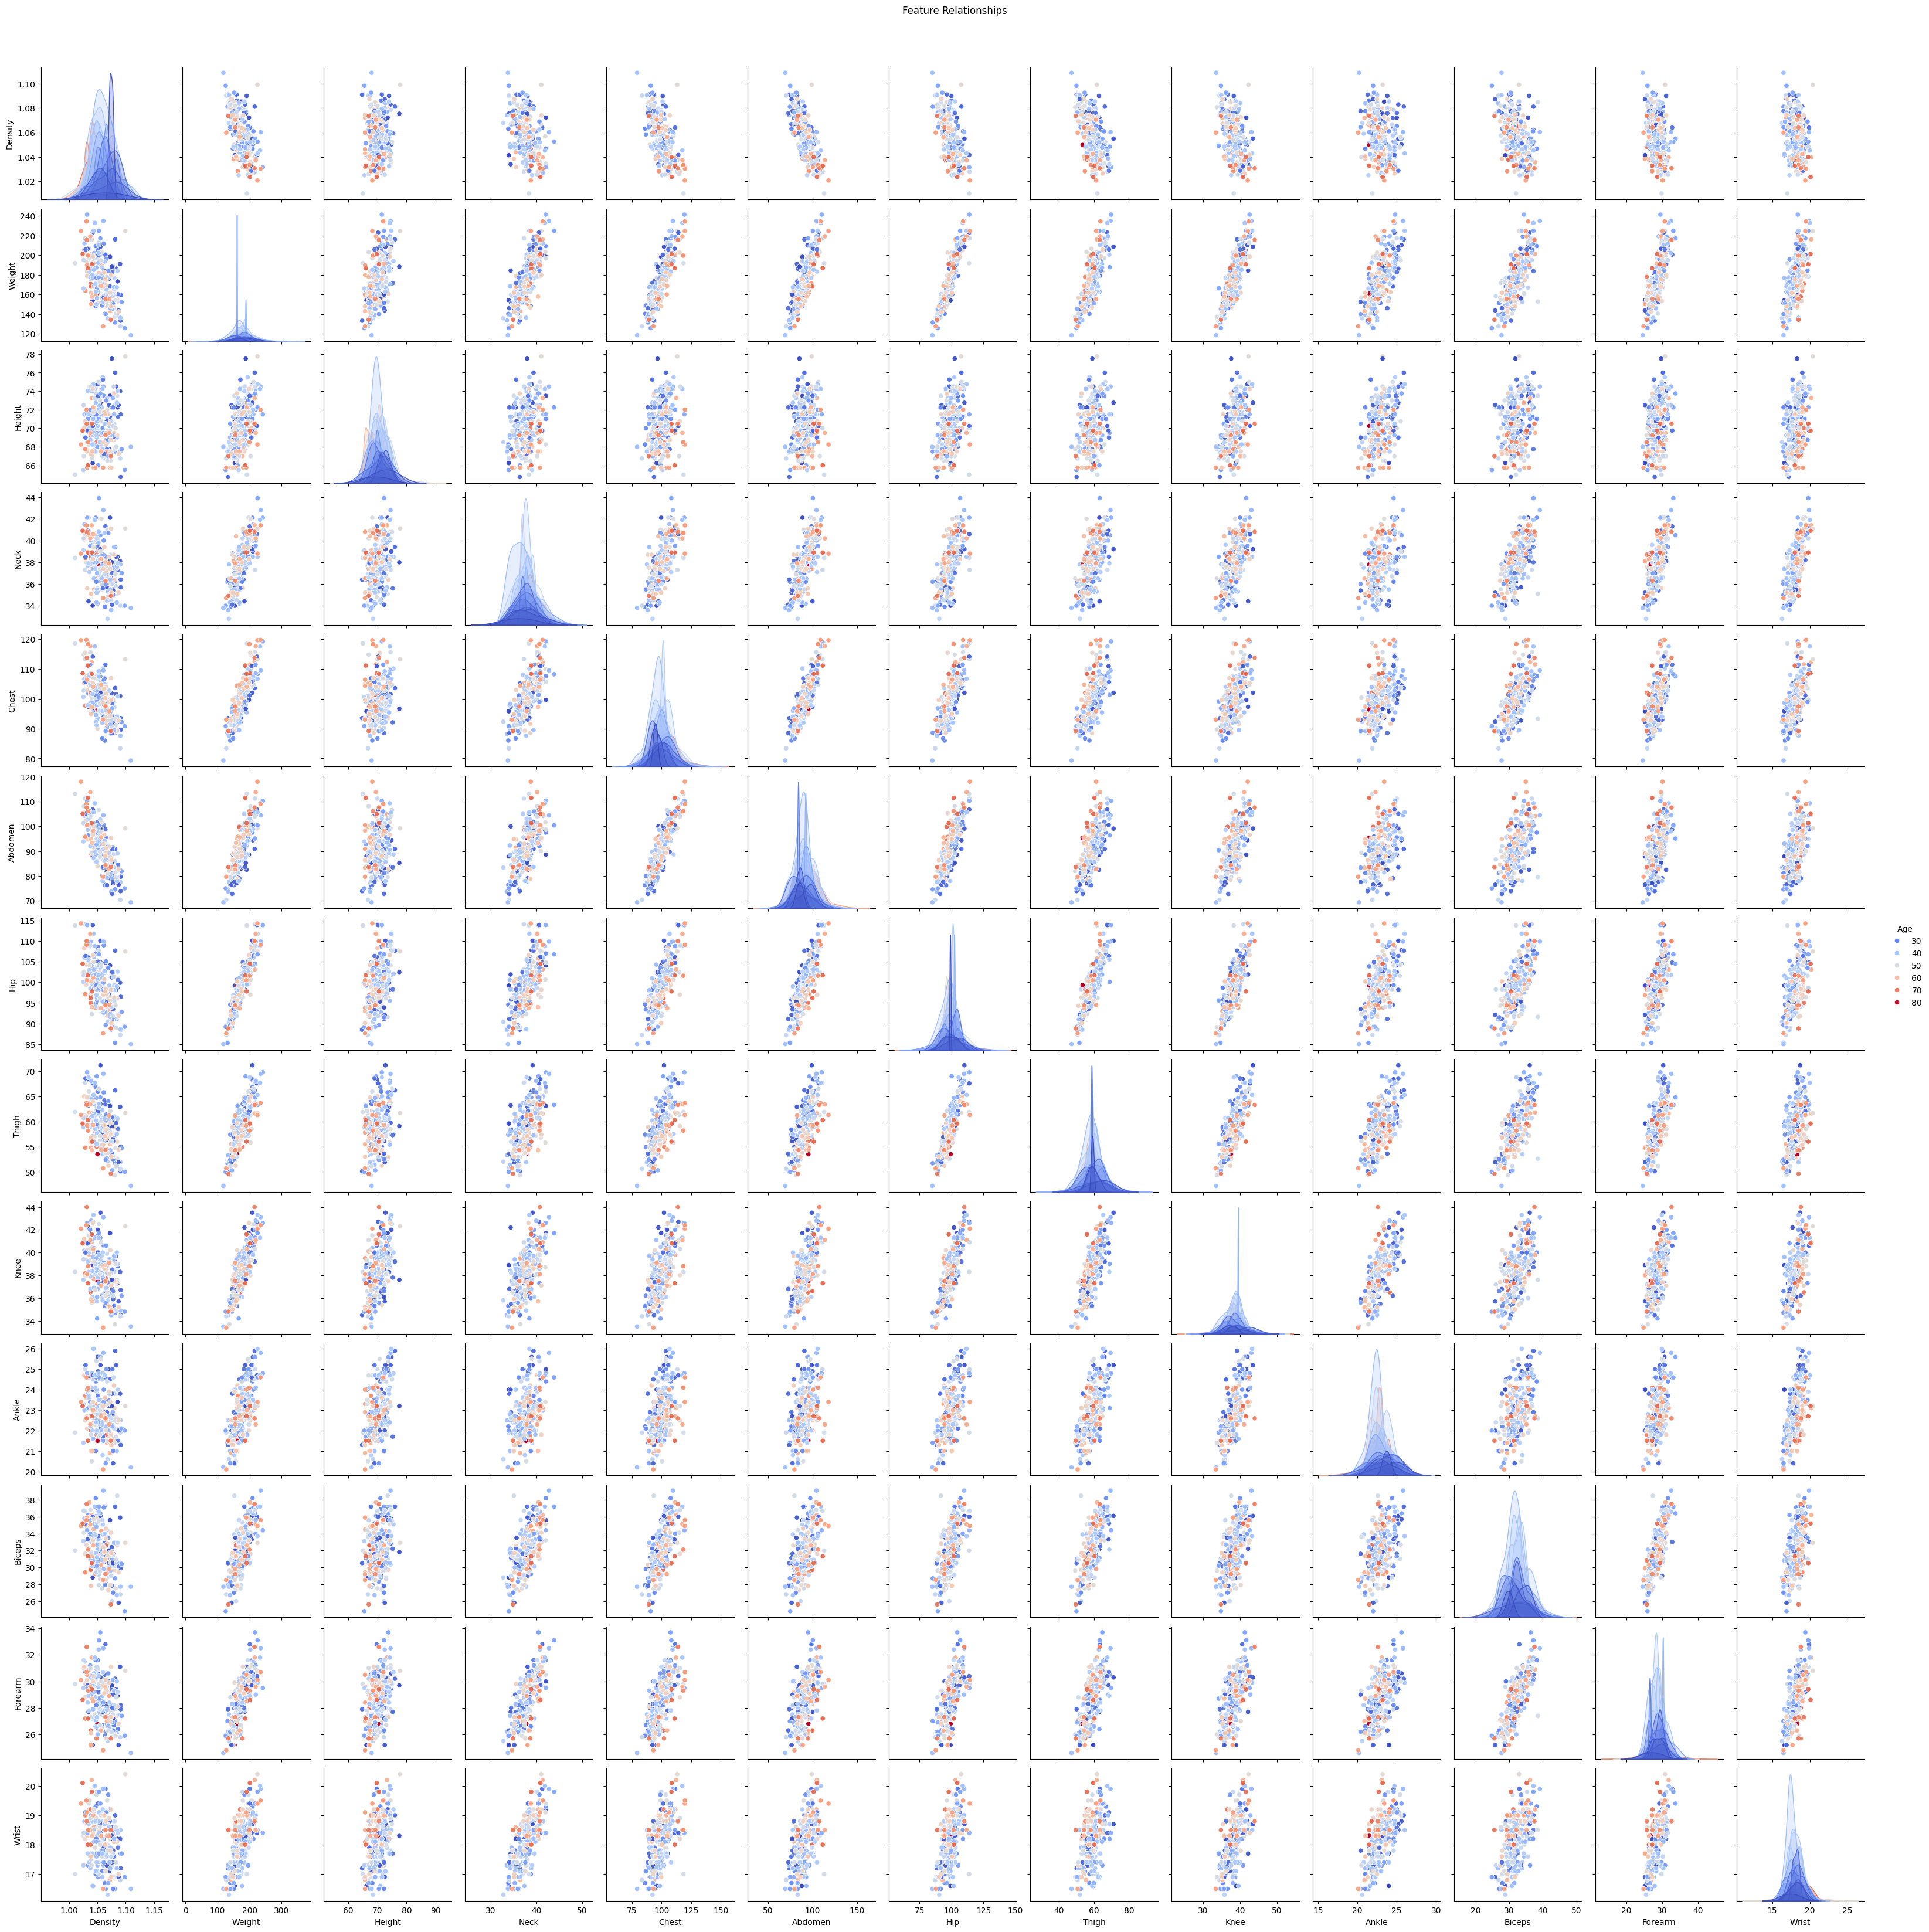

In [123]:
# Pairplot for feature distribution by Body Age to check relation between individual columns
sns.pairplot(df, diag_kind="kde",hue = "Weight", palette="coolwarm")
plt.suptitle("Feature Relationships", y=1.02)
plt.show()

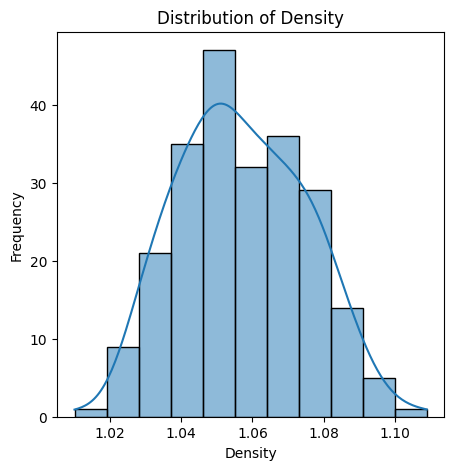

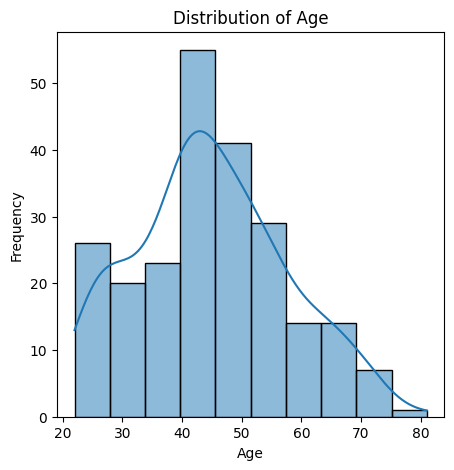

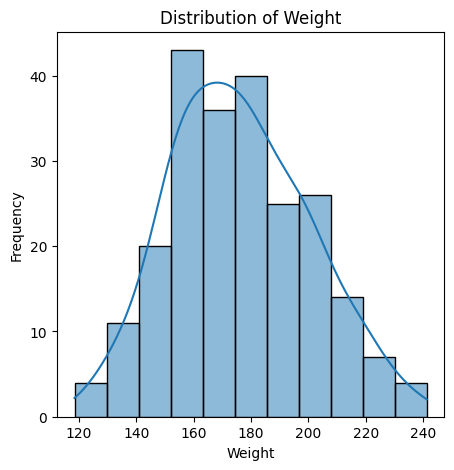

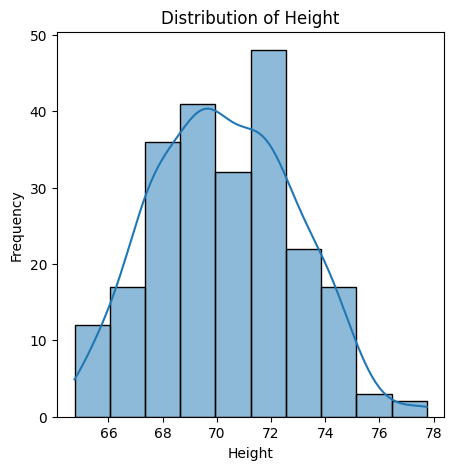

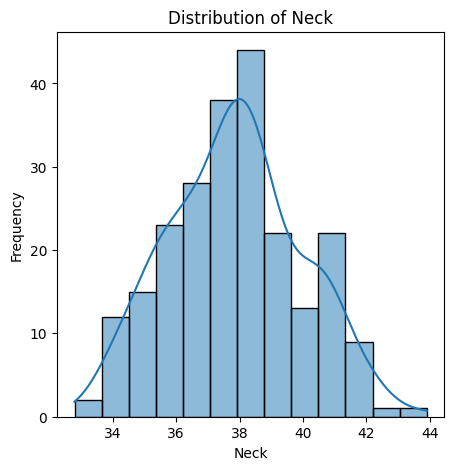

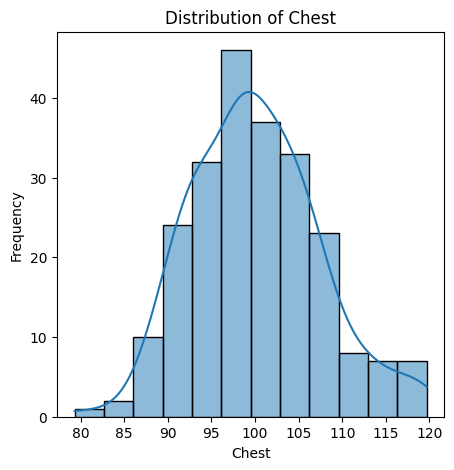

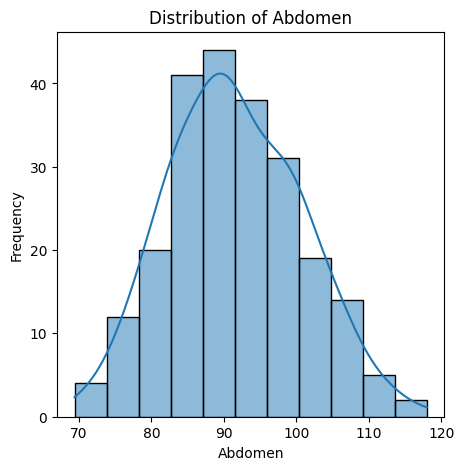

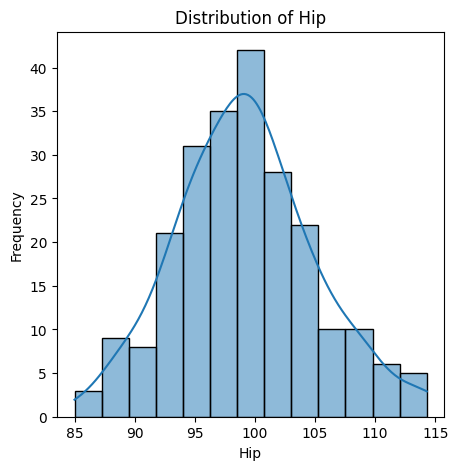

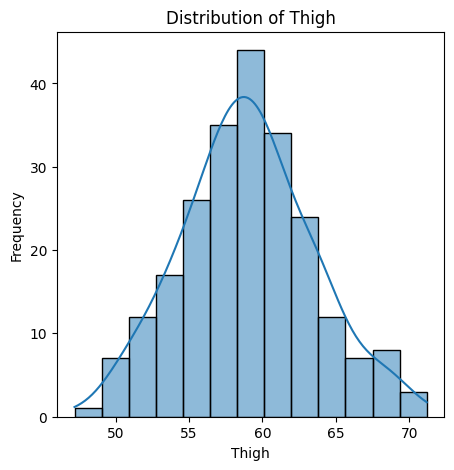

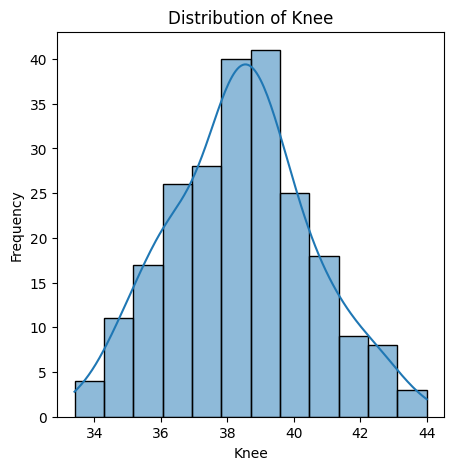

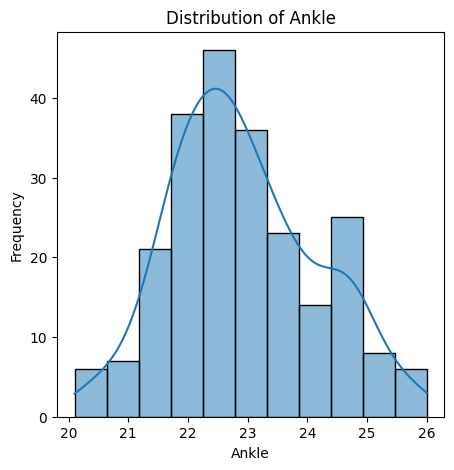

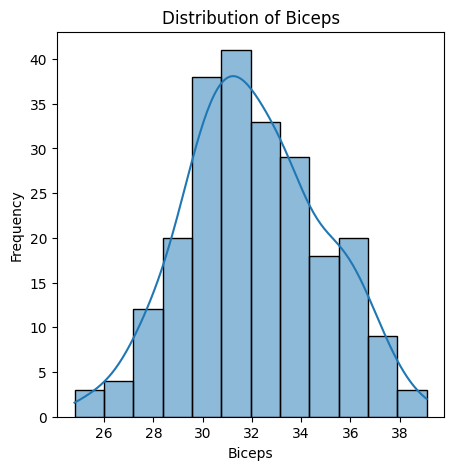

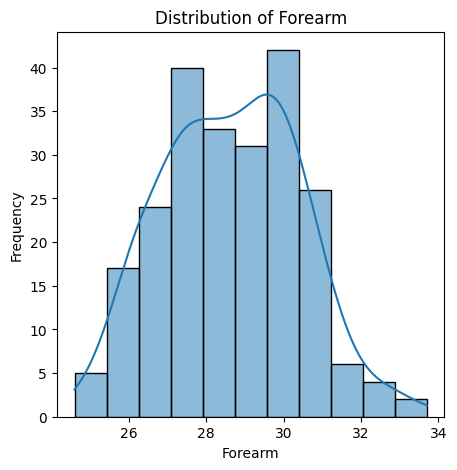

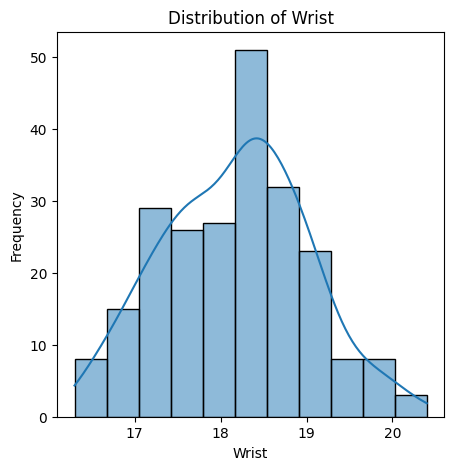

In [121]:
#Creating a d=histplot for all numerical features before removing
column = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13]].columns
for col in column:
    plt.figure(figsize=(5, 5))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


###**2.4. Outliers Detection and Handling**

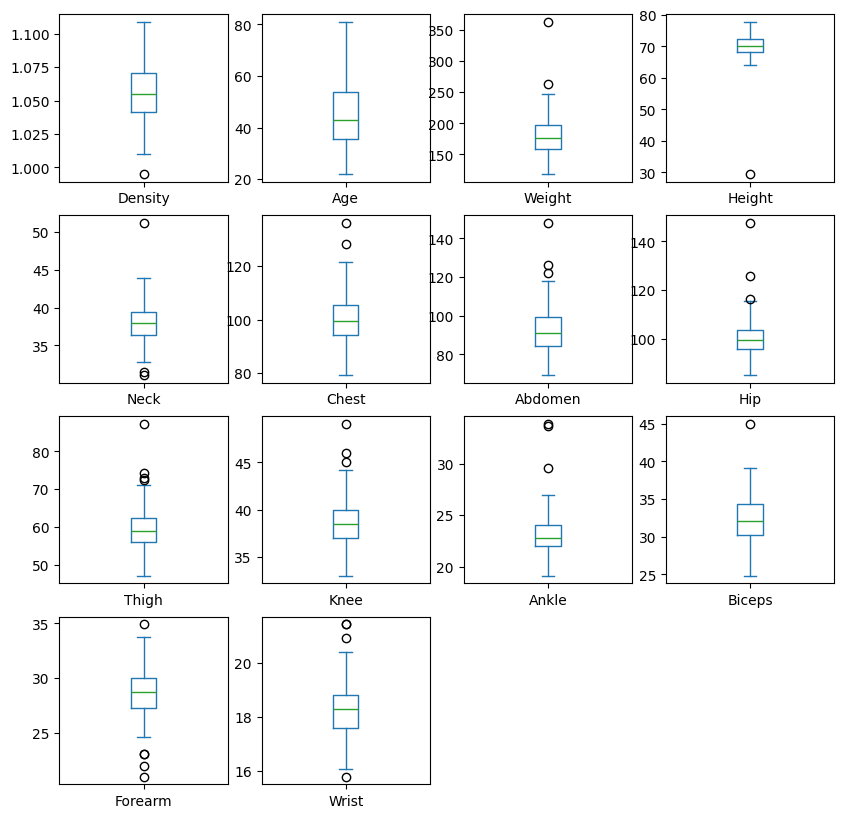

In [42]:
#Boxplot of all the numerical columns to check the outliers
df.plot(kind='box', subplots=True, layout=(4,4), figsize=(10,10))
plt.show()

---

Outliers detected in multiple columns. Needs to be cleaned.

---

In [74]:
#detecting and remove outliers by making a function remove_outliers

column = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13]].columns


#the function takes df and column as input and remove outliers from each o
def remove_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    upper_limit= q3 + 1.5 * iqr
    lower_limit= q1 - 1.5 * iqr
    df = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]
    print(upper_limit)
    print(lower_limit)
    return df

for col in column:
  df = remove_outliers(df,col)

1.1139
0.9979000000000002
81.75
7.75
254.0625
101.5625
78.25
62.25
43.9375
31.837500000000002
121.51250000000002
78.2125
120.50000000000001
62.89999999999999
114.49999999999999
84.10000000000001
71.25
46.849999999999994
44.1125
32.6125
26.5
19.299999999999997
39.650000000000006
24.449999999999992
33.925
23.325000000000003
20.6
15.800000000000002


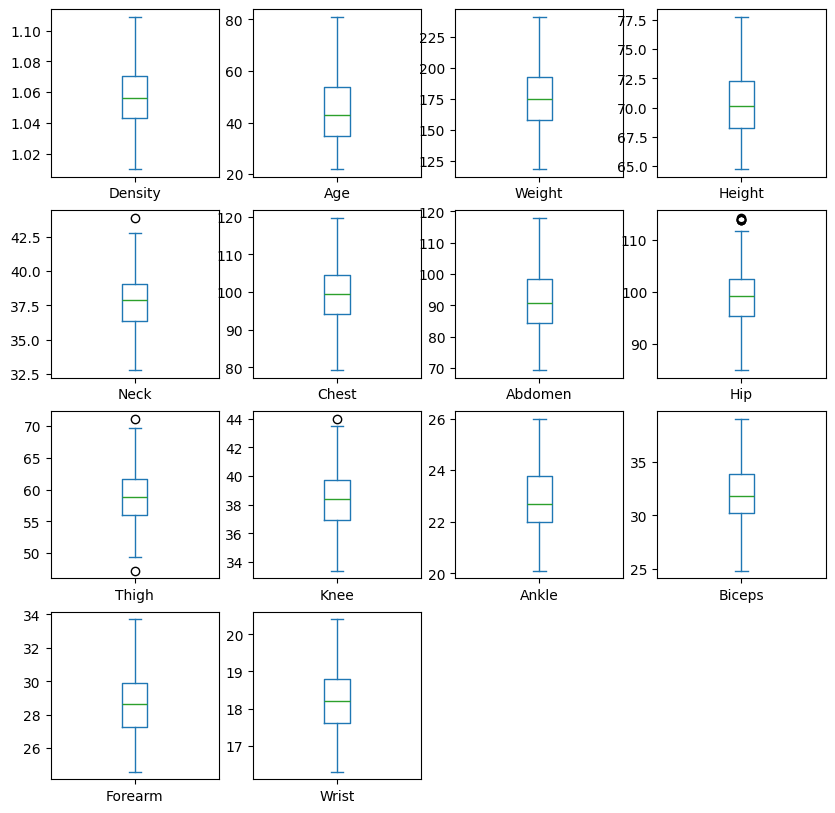

In [75]:
#Checking after outlier detection and removal
df.plot(kind='box', subplots=True, layout=(4,4), figsize=(10,10))
plt.show()

---

Very few of the outliers seen in four of the columns are very close to the normal range. So, no more alteration in outliers done.

OUTLIERS HANDLED !

---

### **2.5 More Visualization for Insights**

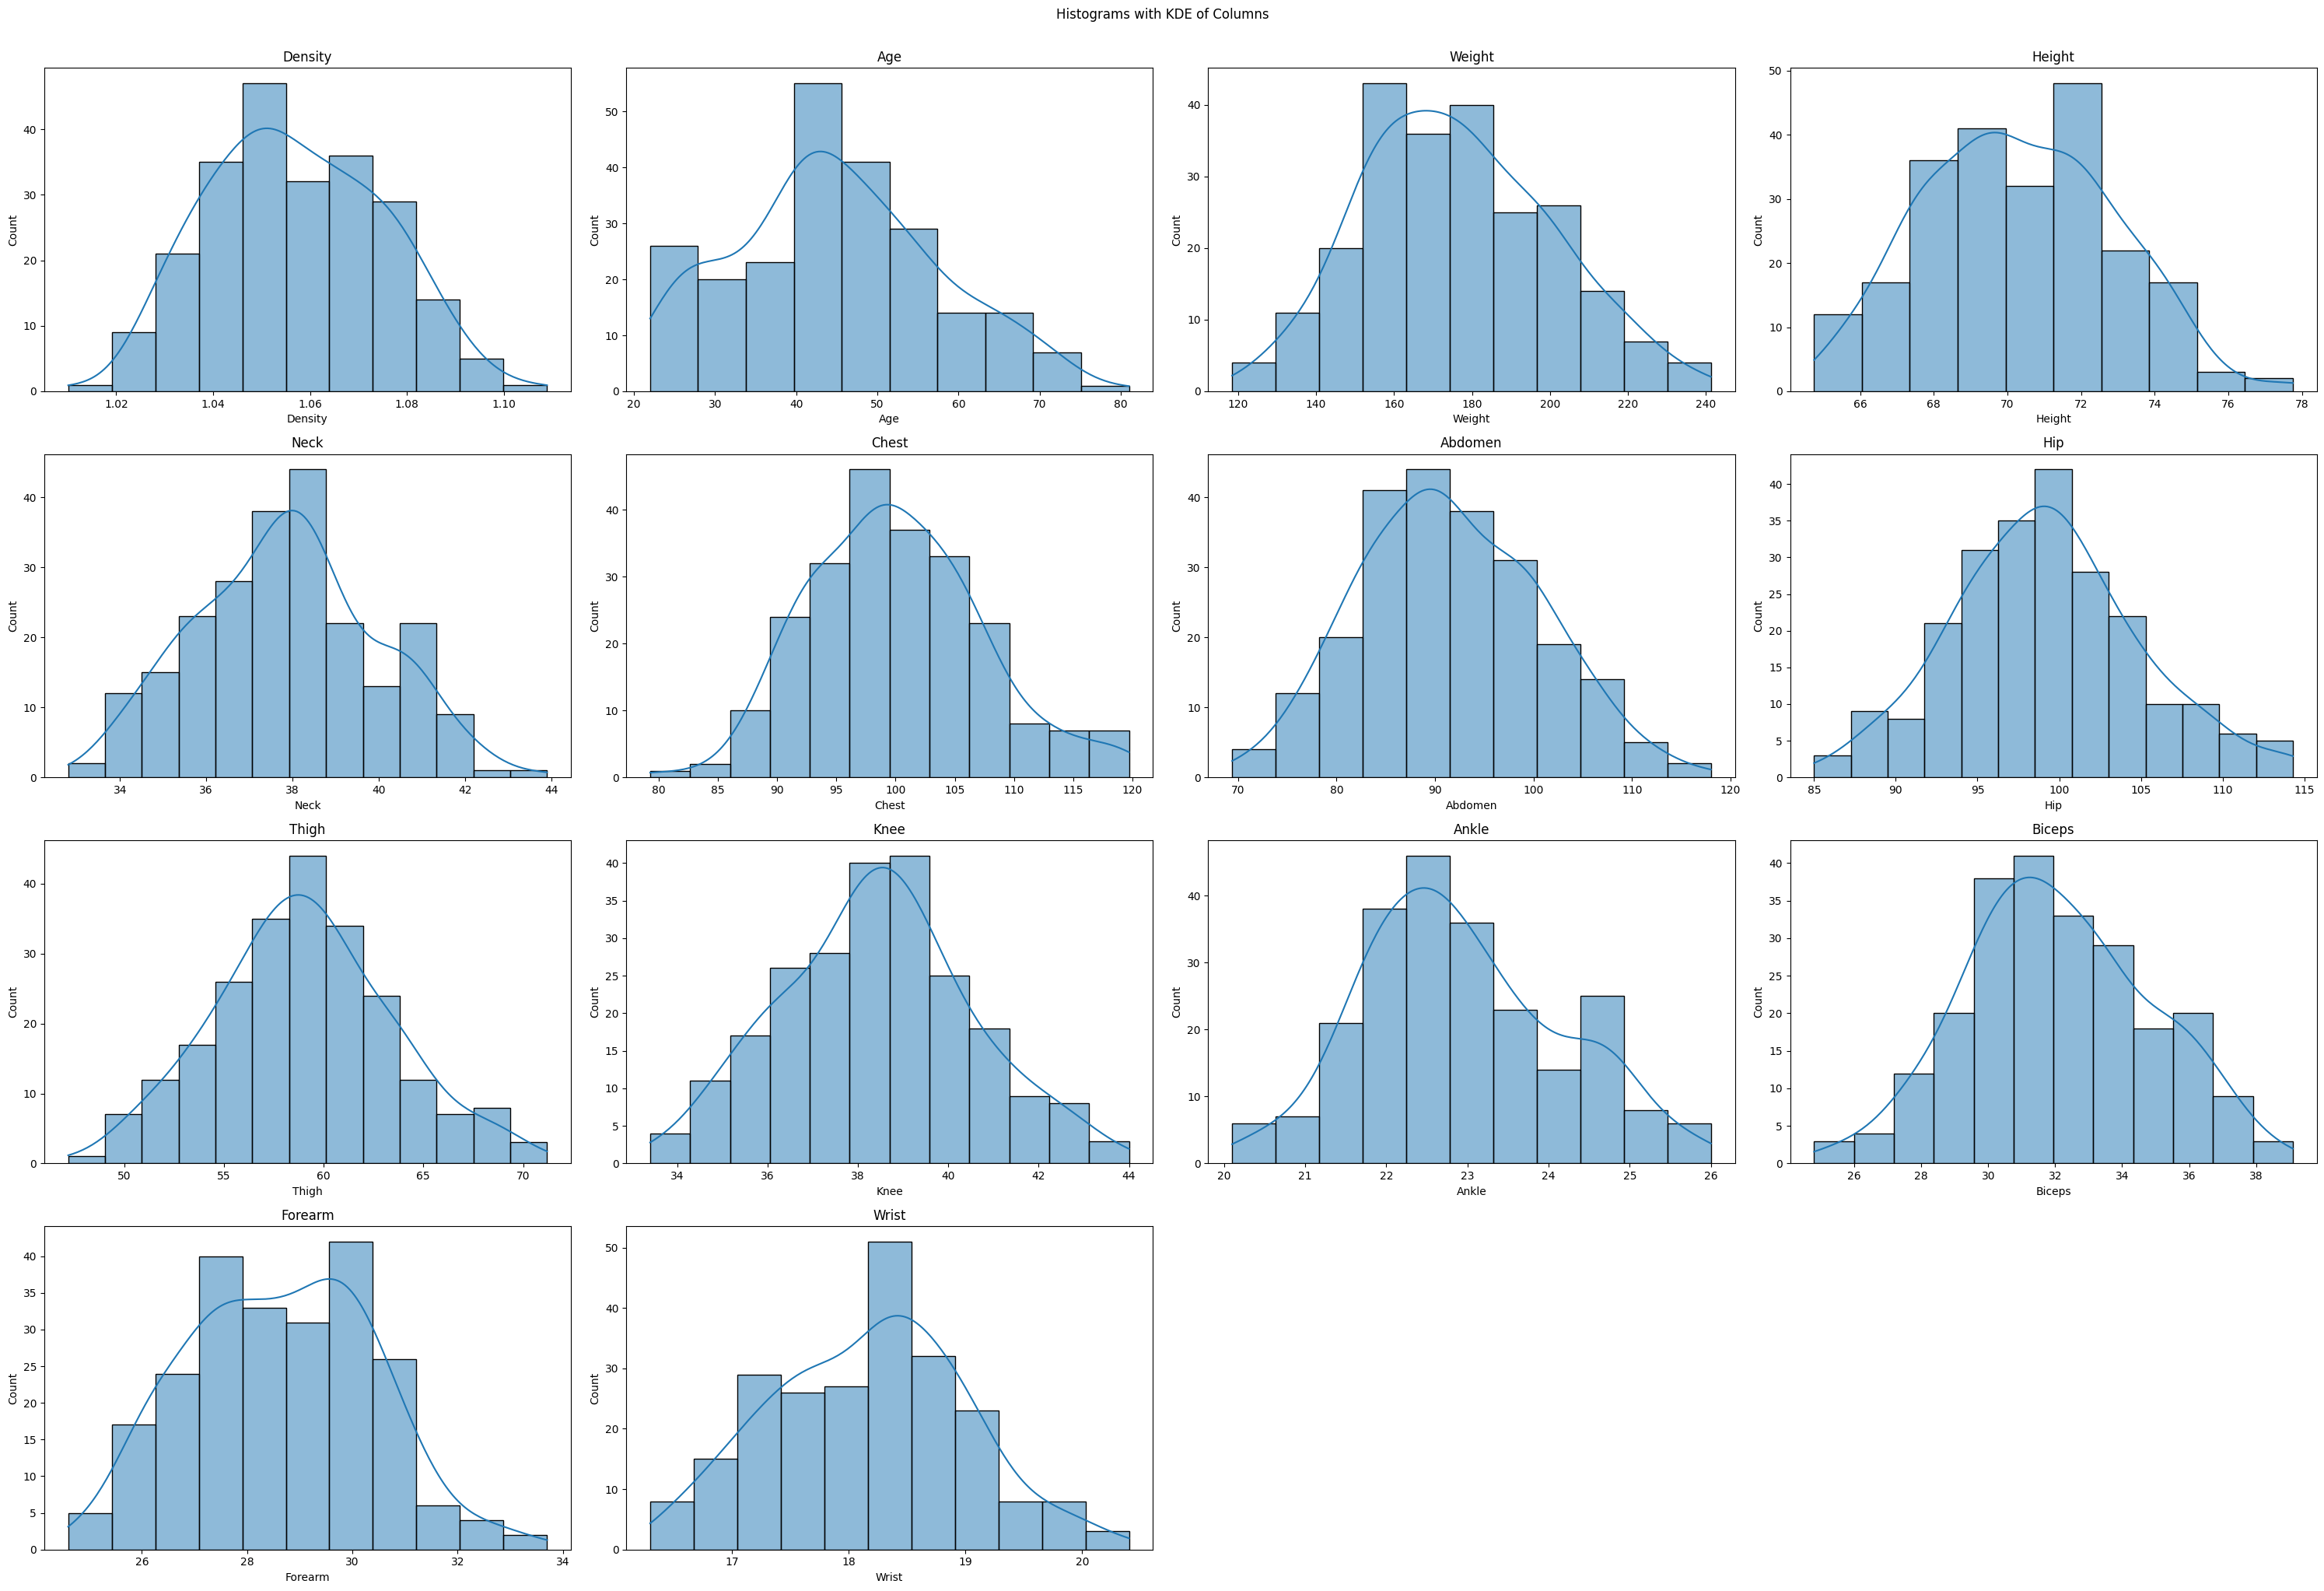

In [76]:
# #Creating a distplot for all numerical features after outliers removal

# # Get the list of columns to plot
# columns_to_plot = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13]].columns


# # Create a figure and a grid of subplots
# # Calculate the number of rows and columns needed for subplots
# n_cols = 4
# n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols # Integer division to get enough rows

# fig, axes = plt.subplots(n_rows, n_cols, figsize=(30, n_rows * 5))

# # Flatten the axes array for easy iteration
# axes = axes.flatten()

# # Iterate through the columns and the axes
# for i, column in enumerate(columns_to_plot):
#     # Plot the histogram with KDE using seaborn.histplot
#     sns.histplot(data=df, x=column, kde=True, ax=axes[i])
#     axes[i].set_title(column)

# # Hide any unused subplots
# for j in range(i + 1, len(axes)):
#     fig.delaxes(axes[j])


# plt.tight_layout() # Adjust layout to prevent overlapping titles and labels
# plt.suptitle("Histograms with KDE of Columns", y=1.02)
# plt.show()

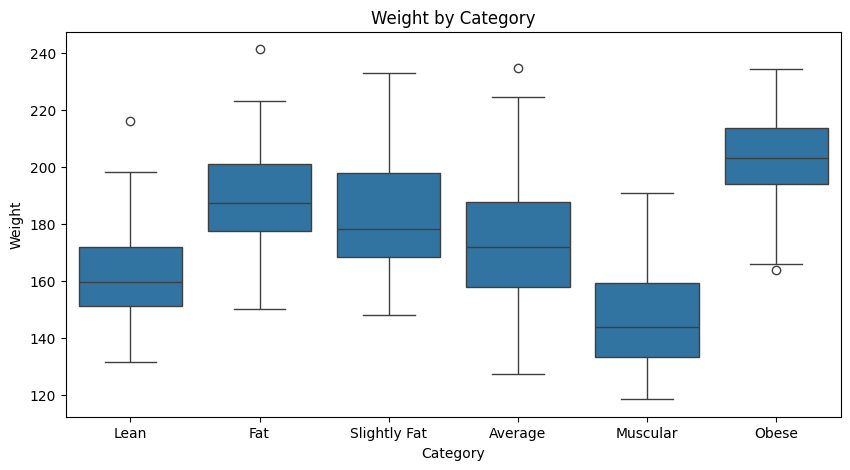

In [118]:
#visualize the category people of different weight belong to
plt.figure(figsize=(10,5))
sns.boxplot(x="Category",y = "Weight",data=df)
plt.title("Weight by Category")
plt.xlabel("Category")
plt.ylabel("Weight")
plt.show()

---
Observations:
1. Obese people's weight lies in between 200 to 220 lbs whereas muscular people tend to have weight in between 140 to 160 lbs.
2. We can say from mean weight that there's a 60lbs weight difference between muscular and obese people.

---

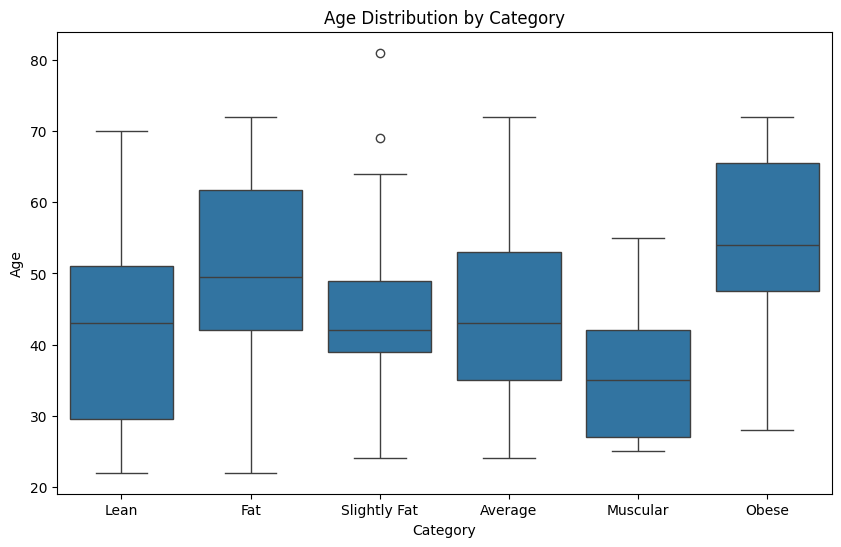

In [112]:
#visualize what category people belong to based on their age
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Age', data=df)
plt.title('Age Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Age')
plt.show()

---
Observations:
1. Normally people in between age 45 to 65 are seen to be obese.
2. Muscular people belong to the age group between 18 to 45.
3. People tend to be lean mostly in age between 30 to 52.
4. People aged 42 to 62 are seen to be fat more often.

---

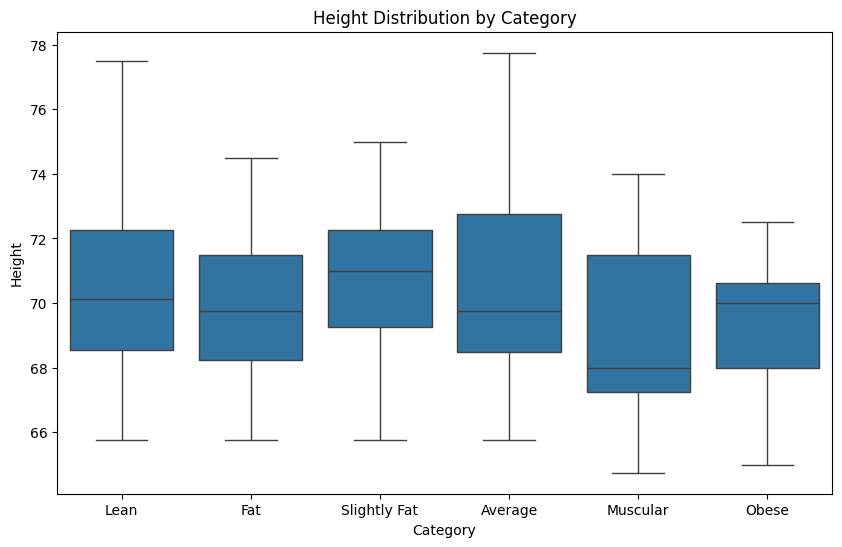

In [132]:
#visualize what category people belong to based on their height
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Height', data=df)
plt.title('Height Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Height')
plt.show()

## **3. Training, Testing and Inference**

In [134]:
# 1. Separate features and target variable
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
X = df[num_cols]
y = df['Category']

# 2. Encode the categorical target variable 'Category'
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 3. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# 4. Display the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (184, 14)
Shape of X_test: (46, 14)
Shape of y_train: (184,)
Shape of y_test: (46,)


### 3.1 **Model Selection and Training**

In [135]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate a RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [139]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predicting categories for test set
y_pred = model.predict(X_test)

# Calculating Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Evaluation Metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1-score (weighted): {f1:.4f}")

Accuracy: 0.9130
Precision (weighted): 0.8649
Recall (weighted): 0.9130
F1-score (weighted): 0.8847


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### **3.2 Prediction**

In [140]:
# Use the trained model's .predict() method to make predictions on the test features, X_test.
y_pred = model.predict(X_test)

# Inverse transform y_pred back to the original categorical labels
y_pred_categorical = label_encoder.inverse_transform(y_pred)

# Display the first few predicted categorical labels
print("First few predicted categorical labels:")
display(y_pred_categorical[:10])

First few predicted categorical labels:


array(['Fat', 'Lean', 'Lean', 'Lean', 'Slightly Fat', 'Lean', 'Lean',
       'Average', 'Slightly Fat', 'Slightly Fat'], dtype=object)